# Crash Course on Statistics and Hypothesis Testing
## Created by Jim Shepich
### 21 November 2021

# Importing Packages

In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Introduction

We'll start out with some statistics terminology:

- **Experiment** - any procedure that can be repeated infinitely many times and has a well-defined set of outcomes
- **Sample Space** - the set of all possible outcomes of an experiment
- **Event** - a collection of outcomes

### Example: Coin Flip <a class="anchor" id="ex-coinflip"></a>

Let's say we're going to perform an **experiment** where we flip three coins. The **sample space** of this experiment is the set:

{TTT, TTH, THT, THH, HTT, HTH, HHT, HHH}

The **event** "there are more heads than tails" is the subset:

{THH, HTH, HHT, HHH}

The **event** "exactly two coins are tails" is the subset:

{TTH, THT, HTT}

### Example: Die Roll <a class="anchor" id="ex-dieroll"></a>

Let's say we do another **experiment** where we roll two six-sided dice. The **sample space** of the experiment is the set:

### {⚀⚀, ⚀⚁, ⚀⚂, ⚀⚃, ⚀⚄, ⚀⚅, ⚁⚀, ⚁⚁, ⚁⚂, ⚁⚃, ⚁⚄, ⚁⚅, ⚂⚀, ⚂⚁, ⚂⚂, ⚂⚃, ⚂⚄, ⚂⚅, ⚃⚀, ⚃⚁, ⚃⚂, ⚃⚃, ⚃⚄, ⚃⚅, ⚄⚀, ⚄⚁, ⚄⚂, ⚄⚃, ⚄⚄, ⚄⚅, ⚅⚀, ⚅⚁, ⚅⚂, ⚅⚃, ⚅⚄, ⚅⚅}

The **event** "both dice have the same number showing" is the subset:

### {⚀⚀, ⚁⚁, ⚂⚂, ⚃⚃, ⚄⚄, ⚅⚅}

And the **event** "the sum of the two numbers showing is equal to 5" is the subset:

### {⚀⚃, ⚃⚀, ⚁⚂, ⚂⚁}

# Probability

The **probability** of an outcome is a number between 0 and 1 that indicates how often that outcome should be observed when we perform the experiment. In our two examples (Coin Toss and Die Roll), each outcome has the same probability, but that is not true for every experiment. 

The **probability** of an event is equal to the sum of the probabilities of the outcomes in the event. Let's go back to our examples and look at some probabilities.

We can think of probability as a function that maps an outcome or event to a real number in the interval $[0,1]$. Common ways to denote the probability of an event $E$ are: $P(E)$, $Pr(E)$, or $\mathbb{P}(E)$.

## Coin Toss

As we said, each outcome has an equal probability. There are 8 outcomes in the sample space, so each outcome has a probability of $\frac{1}{8}$. 
- The event "there are more heads than tails" has four outcomes each with probability $\frac{1}{8}$, so the probability of that event is $\frac{4}{8}=\frac{1}{2}$.
- The event "exactly two coins are tails" has three outcomes each with probability $\frac{1}{8}$, so the probability of that event is $\frac{3}{8}$.

## Die Roll

As we said, each outcome has an equal probability. There are 36 outcomes in the sample space, so each outcome has a probability of $\frac{1}{36}$. 
- The event "both dice have the same number showing" has 6 outcomes each with probability $\frac{1}{36}$, so the probability of that event is $\frac{6}{36}=\frac{1}{6}$.
- The event "the sum of the two numbers showing is equal to 5" has 4 outcomes each with probability $\frac{1}{36}$, so the probability of that event is $\frac{4}{36}=\frac{1}{9}$.




# Random Variables <a class="anchor" id="variables"></a>

A **random variable** is a variable whose value is determined by the outcome of a statistical experiment. Some examples of random variables and their possible values:

- The number of coins that come up heads if three coins are flipped. Can be 0, 1, 2, or 3.
- The sum of the showing numbers of two rolled (six-sided) dice. Can be any whole number between 2 and 12.
- The number of students who show up to school on a given day. Can be as few as zero or many as all the students enrolled at the school.


Traditionally, random variables must be real-valued. A non-numeric analogue of a random variable is a **random quantity** (source: https://stats.stackexchange.com/questions/236765/does-a-random-variable-needs-to-be-numeric). An example of a random quantity is the UV index on a given day, which can take on values of low, moderate, high, and very high. Many random quantities can represented with random variables by mapping the outcomes to real numbers (i.e. replace low, moderate, high, very high with 0, 1, 2, 3).


# Probability of Random Variables

When you are studying a random variable, you will often want to know "what is the probability that this random variable, when measured is equal to some number?" If $X$ is our random variable and $k$ is the outcome in question, then we write the probability as $\mathbb{P}(X=k)$.

### Example: Die Roll

Let $X$ be the sum of two (six-sided) die rolls. As we discussed earlier, the probability that this sum is equal to 5 is $\frac{1}{9}$, so:

$p_X(5)=\frac{1}{9}$


### Example: AP Data

For our next example, we're going to look at a dataset describing participation in AP tests in 2021.

In [4]:
ap_data = pd.read_excel("2021-program-summary-report.xls",skiprows=2,index_col=0)
ap_data.dropna(axis=0,inplace=True)
ap_data

,SCHOOLS*,9TH GRADE,10TH GRADE,11TH GRADE,12TH GRADE,Not\nHS,<9TH GRADE,MALE,FEMALE,ANOTHER,2020 PROGRAM TOTAL,2021 PROGRAM TOTAL,% CHANGE 2020-2021,NO. OF COLLEGES
ART AND DESIGN: DRAWING,4106.0,38.0,884.0,5195.0,11950.0,11.0,2.0,3182.0,14692.0,222.0,20486.0,18096.0,-12.0,877.0
ART AND DESIGN: 2-D,5473.0,384.0,1737.0,9626.0,22681.0,38.0,2.0,7898.0,26214.0,397.0,36901.0,34509.0,-6.0,1086.0
ART AND DESIGN: 3-D,1547.0,6.0,179.0,1019.0,3359.0,3.0,1.0,1184.0,3362.0,27.0,5281.0,4573.0,-13.0,419.0
ART HISTORY,2045.0,562.0,4809.0,7253.0,7987.0,17.0,4.0,6599.0,13939.0,95.0,23567.0,20633.0,-12.0,660.0
BIOLOGY,11580.0,5391.0,35476.0,100177.0,89248.0,191.0,41.0,86033.0,143932.0,562.0,233444.0,230527.0,-1.0,1940.0
CALCULUS AB,13878.0,878.0,9967.0,84025.0,156113.0,527.0,127.0,128657.0,122529.0,453.0,266430.0,251639.0,-6.0,2162.0
CALCULUS BC,7862.0,666.0,6691.0,43009.0,73858.0,245.0,130.0,72708.0,51721.0,170.0,127864.0,124599.0,-3.0,1492.0
CHEMISTRY,9069.0,469.0,17039.0,79224.0,38880.0,360.0,24.0,66105.0,69623.0,269.0,145540.0,135997.0,-7.0,1521.0
CHINESE LANGUAGE & CULTURE,1886.0,2537.0,3326.0,3980.0,3103.0,13.0,163.0,5858.0,7240.0,24.0,14663.0,13122.0,-11.0,331.0
COMPUTER SCIENCE A,6458.0,1942.0,15869.0,29477.0,27095.0,160.0,132.0,55577.0,18918.0,181.0,70580.0,74676.0,6.0,1123.0


Let's do an experiment where we randomly pick one high schooler who took the AP Chemistry test in 2021. Let the random variable $X$ be the grade that the student is in.

In [5]:
chem = ap_data.loc["CHEMISTRY"]
total = sum(chem[[f"{n}TH GRADE" for n in range(9,13)]])
chem_probs = []
for k in range(9,13):
    prob = chem[f"{k}TH GRADE"]/total
    print(f'P(X={k}) = {prob}')
    chem_probs.append(prob)

P(X=9) = 0.0034583960121523168
P(X=10) = 0.12564522313659557
P(X=11) = 0.5841960888416954
P(X=12) = 0.28670029200955666


In the code cell above, I calculated the probability of each grade by dividing the number of students of that grade who took the AP Chem exam by the total number of high school students who took the AP Chem exam. This process is called **normalization**, and it converts raw counts to probabilities (which must be in the range $[0,1]$). 

## Probability Mass Function

A **probability mass function (pmf)** is a function that describes the probability of each possible value of a variable. For a variable $X$, we write its pmf as

$p_X(k)=\mathbb{P}(X=k)$

I'll plot some pmfs below.

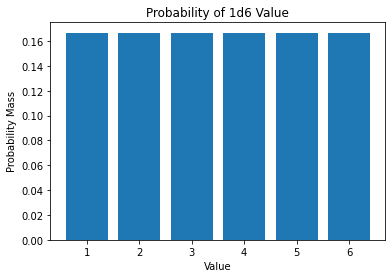

In [6]:
plt.bar(x=[i for i in range(1,7)], height=[1/6 for i in range(1,7)])
plt.xlabel("Value")
plt.ylabel("Probability Mass")
plt.title("Probability of 1d6 Value")
plt.show()

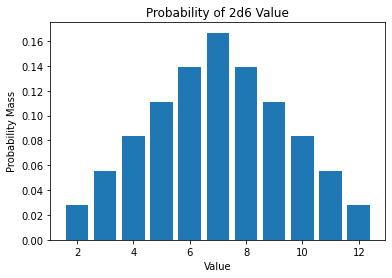

In [7]:
roll_2d6 = [i+j for i in range(1,7) for j in range(1,7)]
probs_2d6 = []
for k in range(2,13):
    probs_2d6.append(roll_2d6.count(k)/len(roll_2d6))
    
plt.bar(x=[i for i in range(2,13)], height=probs_2d6)
plt.xlabel("Value")
plt.ylabel("Probability Mass")
plt.title("Probability of 2d6 Value")
plt.show()

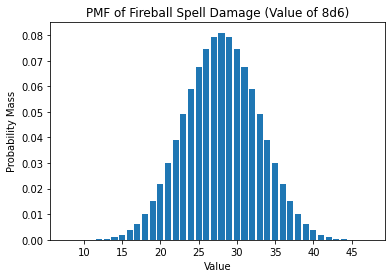

In [8]:
roll_8d6 = [sum(rolls) for rolls in itertools.product([1,2,3,4,5,6],repeat=8)]
probs_8d6 = []
for k in range(min(roll_8d6),max(roll_8d6)):
    probs_8d6.append(roll_8d6.count(k)/len(roll_8d6))
    
plt.bar(x=[i for i in range(min(roll_8d6),max(roll_8d6))], height=probs_8d6)
plt.xlabel("Value")
plt.ylabel("Probability Mass")
plt.title("PMF of Fireball Spell Damage (Value of 8d6)")
plt.show()

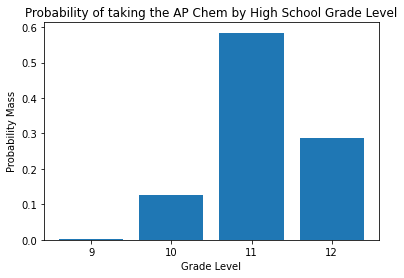

In [9]:
plt.bar(x=[9,10,11,12], height=chem_probs, tick_label=[9,10,11,12])
plt.xlabel("Grade Level")
plt.ylabel("Probability Mass")
plt.title("Probability of taking the AP Chem by High School Grade Level")
plt.show()

A few things to note about pmfs:
- They are not continuous, since they correspond to discrete-valued random variables.
- The sum of $p_X(k)$ over the entire domain is equal to 1.

## Cumulative Distribution Function

A **cumulative distribution function (cdf)**  is a running total of probability mass from the lower bound of the pdf up to a given value $k$. For a variable $X$, we write its cdf as:

$F_X(k)=\mathbb{P}(X\leq k)=\sum_{i=-\infty}^{k}p_X(i)$

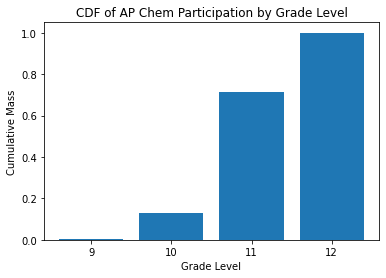

In [43]:
plt.bar(x=[9,10,11,12], height=np.cumsum(chem_probs), tick_label=[9,10,11,12])
plt.xlabel("Grade Level")
plt.ylabel("Cumulative Mass")
plt.title("CDF of AP Chem Participation by Grade Level")
plt.show()

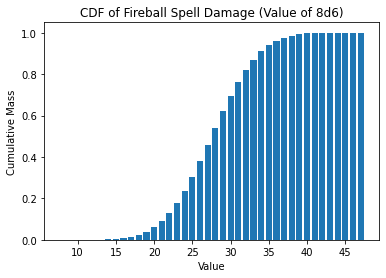

In [10]:
plt.bar(x=[i for i in range(min(roll_8d6),max(roll_8d6))], height=np.cumsum(probs_8d6))
plt.xlabel("Value")
plt.ylabel("Cumulative Mass")
plt.title("CDF of Fireball Spell Damage (Value of 8d6)")
plt.show()

A few things to note about cdfs:
- When evaluated at the lower bound, they are equal to 0; when evaluated at the upper bound, they are equal to 1.
- If we want to know $\mathbb{P}(X>k)$, it is equal to $1-F_X(k)$.

## Continuous Distributions - Probability Density

Often, we will work with random variables that can take on any value in a continuous interval, instead of a set of discrete values. Some examples are "the mass of a random coin", "the length of a random french fry", "the time it takes for a random popcorn kernel to pop", or "the body temperature of a random person". We call these **continuous random variables**

Instead of a discrete-valued probability mass function, continuous random variables have continuous-valued **probability density functions (pdfs)**. We denote the pdf of a continuous random variable $X$ as:

$f_X(x)$, where $f_X(x)$ is the local probability density of the variable $X$ around the value $x$.

Beware: pdfs cannot be treated exactly the same as pmfs. The best way to think about the difference between pmfs and pdfs is to think about the difference between mass and density. 

- Density defines how concentrated the mass is in a given patch of volume. Likewise, probability density defines how concentrated the probability mass is in a given patch of the sample space.
  - This means that the pdf does not directly tell us the probability of observing a given value. In other words, $f_X(x)\neq \mathbb{P}(X=x)$ 
- The mass of an object within a point of space is zero because even if there is nonzero density, a point has no volume. Likewise, the probability density of a given value in the sample space is 0.
  - Why? Because a continuous random variable has uncountably infinitely many possible outcomes. The length of a fry can be $5.\bar0$ cm, or $5.000001\bar0$ cm, or $4.\bar9$ cm, etc.
  
Let's look at some examples.